### Author: Kubam Ivo
### Purpose: Titanic Kaggle competition 
### Date: 8/10/2020


# Data Exploration

Data exploration was done on the given train data set with 891(records) by 12(columns). Only 38.4 % of the total passengers survived. Most of the survivals were women (68.1%). Also, women had 74.2 % survival rate and only 18.9% for men.  Passenger who were in class one and three survived more than passengers in class three. The average fare for those who survived was 48$ while their average age was 28 years. For some reason, passengers who survived the disaster mostly board the ship at southampton (63.5%). Age was almost normally distributed with average age of 30 years. The fare was skewed with most passengers falling in the lower price zone. Very high percentage (77.7) of missing values in the cabin column. Age also had some missing values

### Data Dictionary

Visit this link to know more about variables definitions and their values: https://www.kaggle.com/c/titanic/data?select=train.csv

In [92]:
# Importing libraries
import pandas as pd
import numpy as np

In [93]:
#Importing the training data set
train_data = pd.read_csv("train.csv")

In [94]:
#Getting the train data set dimension
train_data.shape

(891, 12)

In [95]:
# Preview of the train data set first five records
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
x_num = train_data.loc[:, ['Age','Fare']] # extracting the numerical features
x_cat = train_data.loc[:, ["Survived","Pclass","Sex","Cabin"]] #Extracting categorical features


In [97]:
# Survial statisitcs
train_data.groupby(["Survived"])["Survived"].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [98]:
#survial statistics group by sex
train_data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [99]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [100]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [38]:
#Survival statistics group by passenger class
train_data.groupby(["Pclass", "Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [101]:
#survial statistics group by Embarkation
train_data.groupby(["Embarked", "Survived"])["Survived"].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [25]:
# Statistics for Age and Fare
x_num.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [46]:
# Statistics for Age and Fare group by survival
train_data.groupby(["Survived"])["Fare","Age"].describe()

C:\Users\SEED\anaconda3\envs\amlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Fare                                                            \
          count       mean        std  min      25%   50%   75%       max   
Survived                                                                    
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000   
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292   

            Age                                                      
          count       mean        std   min   25%   50%   75%   max  
Survived                                                             
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0

In [103]:
# Statistics for Age and Fare group by survival
train_data.groupby(["Survived"])["SibSp","Parch"].describe()

C:\Users\SEED\anaconda3\envs\amlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


SibSp                                               Parch            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Survived                                                                        
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0  549.0  0.329690   
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0  342.0  0.464912   

                                             
               std  min  25%  50%  75%  max  
Survived                                     
0         0.823166  0.0  0.0  0.0  0.0  6.0  
1         0.771712  0.0  0.0  0.0  1.0  5.0

## Visualizations

In [65]:
# Importing the necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

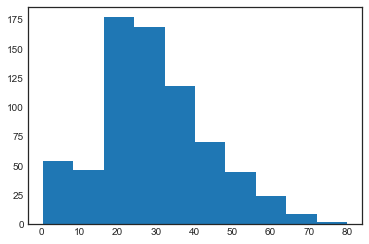

In [66]:
# Age and Fare distribution
%matplotlib inline
plt.style.use('seaborn-white')
plt.hist(x_num["Age"])


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

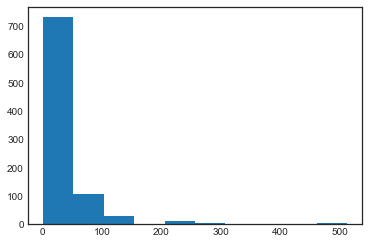

In [67]:

plt.hist(x_num["Fare"])

In [88]:
x_viz = train_data.loc[:, ['Age','Fare','Survived']]

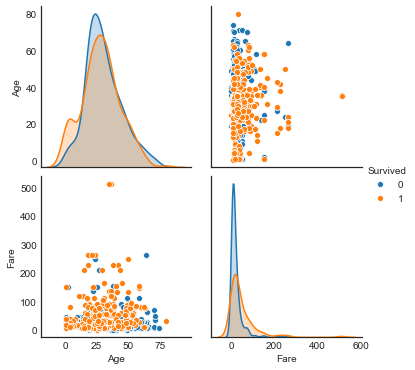

In [89]:
sns.pairplot(x_viz, hue='Survived')

In [90]:
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [91]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(train_data)

Your selected dataframe has 12 columns and 891 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,687,77.1,687,77.1,object
Age,0,177,19.9,177,19.9,float64
Embarked,0,2,0.2,2,0.2,object
